###AUTHOR 1: Saad Abdullah, Contribution in EDA & Linear Regression.
* Did the Exploratory Data Analysis.
* Applied Linear Regression with multiple feature selection techniques.


###AUTHOR 2: Abdul Wahab


*   Applied Support Vector Regressor (SVR) with RBF kernel and standard scaling
*   Performed hyperparameter tuning using GridSearchCV to optimize SVR performance.
*  Comparison & Analysis of all 5 models


###AUTHOR 3: Lameya Islam, Contribution on:
*   Decision Tree, Random Forest Regressor, Gradient Boosting Regressor(GB) with Outliers
*   Decision Tree, Random Forest Regressor, Gradient Boosting Regressor(GB) without Outliers
*   Feature Importance in GB




# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [ ]:
file_url = 'https://raw.githubusercontent.com/wahabmangat/ds-mini-project2/main/boston_housing.csv'
df = pd.read_csv(file_url)

df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


# Data Cleaning

In [ ]:
# Drop the 'Unnamed: 0' column as it is unnecessary
df = df.drop(columns=['Unnamed: 0'])
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
#summary_statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Heatmap for Correlation

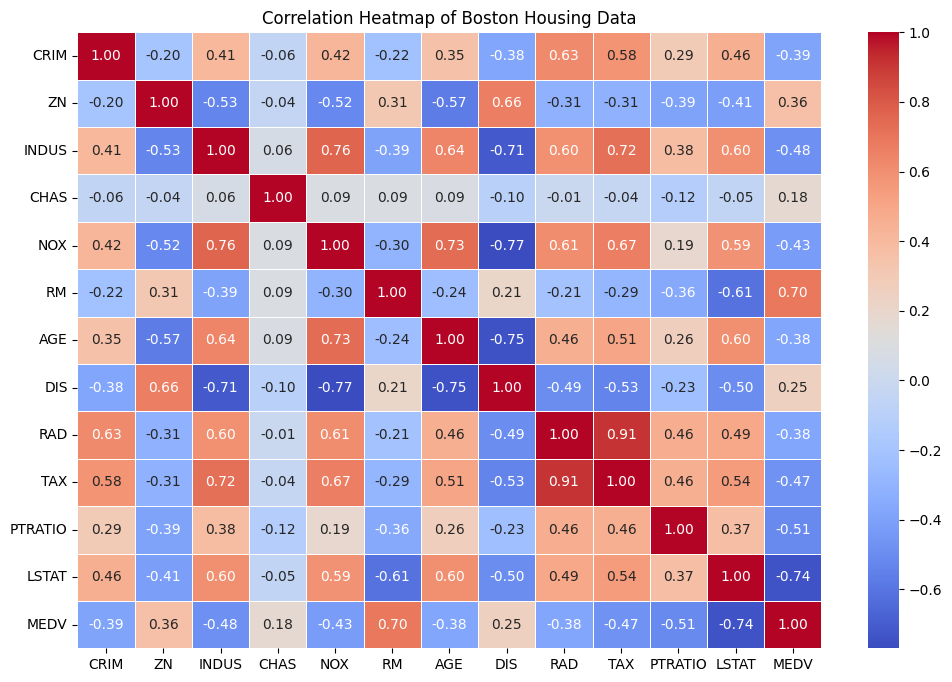

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Boston Housing Data')
plt.show()

#Histogram
### For Viewing the distribution of features


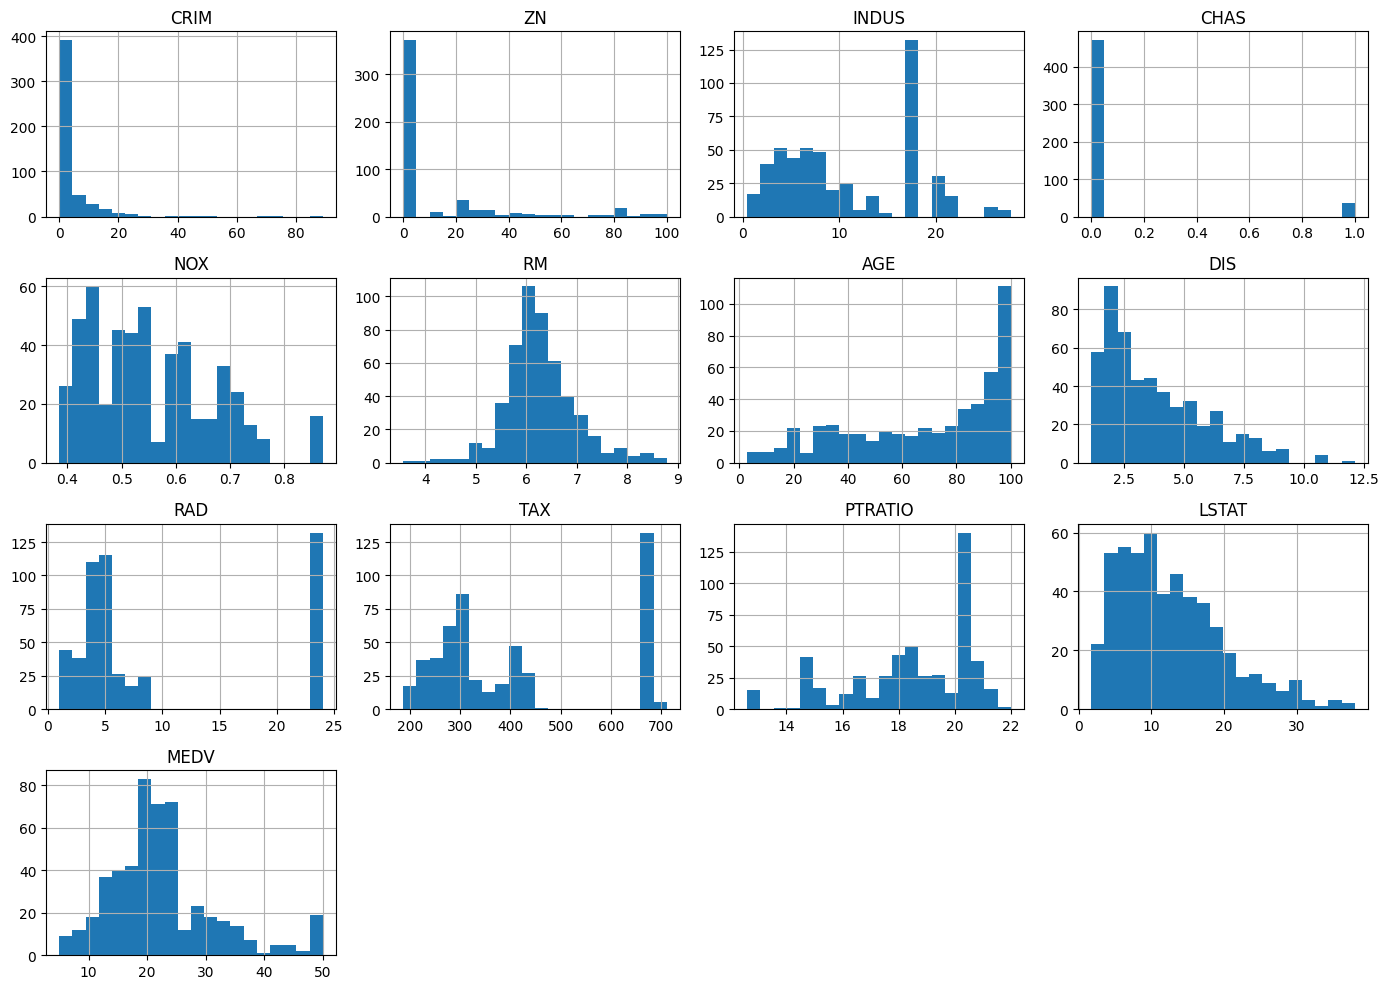

In [ ]:
df.hist(bins=20, figsize=(14, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

# Box plots
#### to see if there are outliers in data.

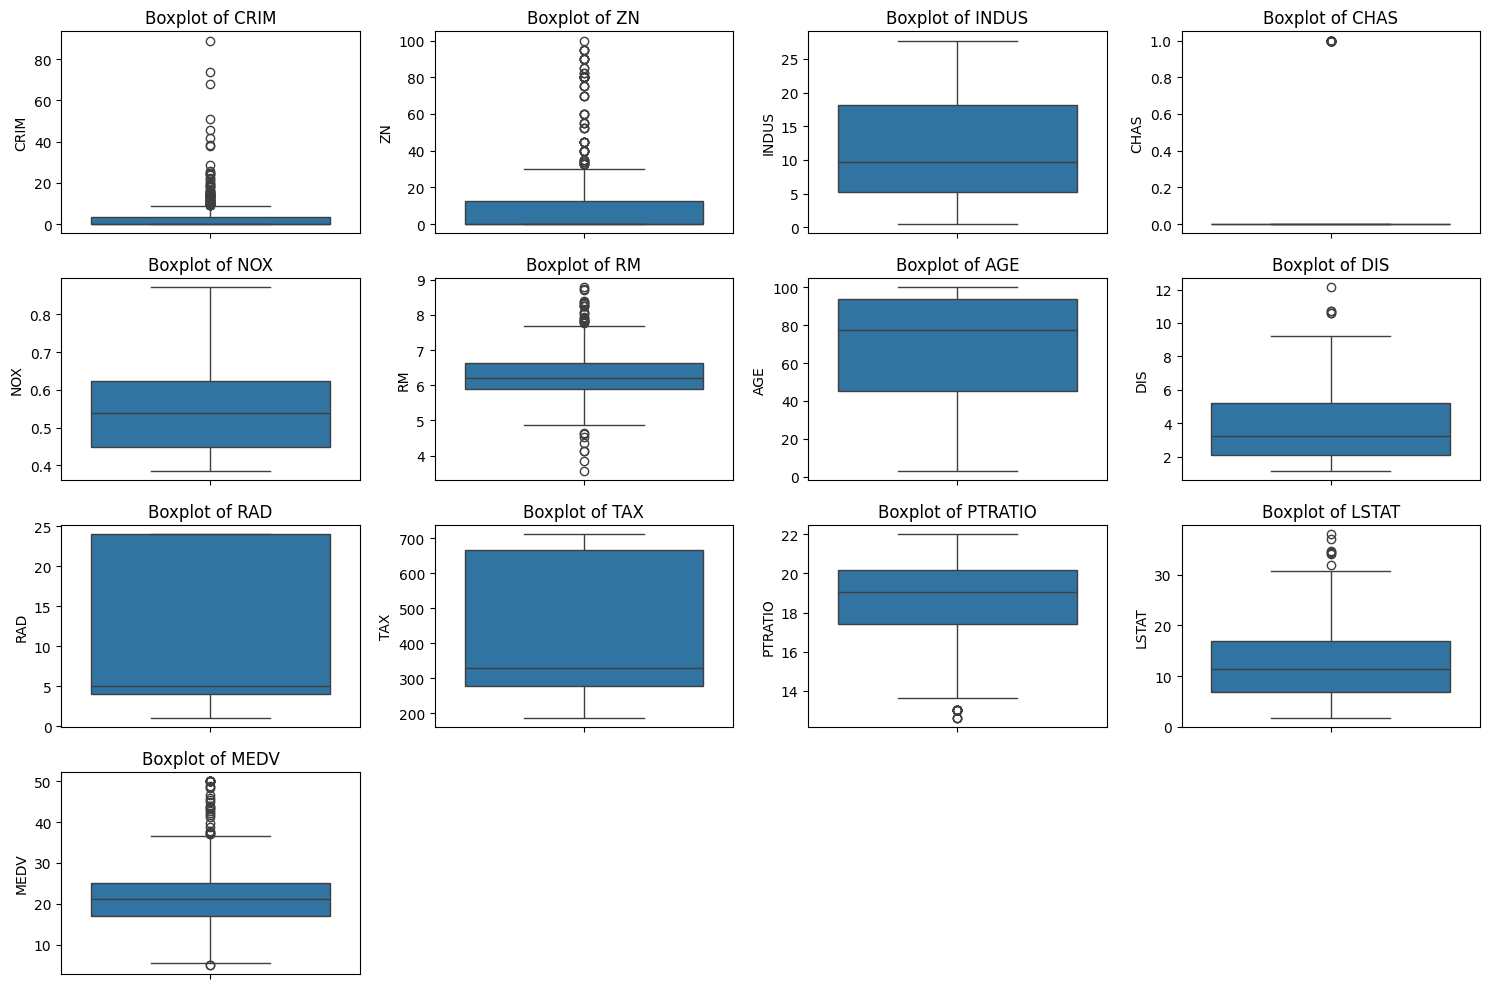

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)  # Adjust subplot grid size based on the number of features
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# Pair plots
#### to see more precisely the relationship between different attributes. (these attributes are chosen after observing Heatmap)

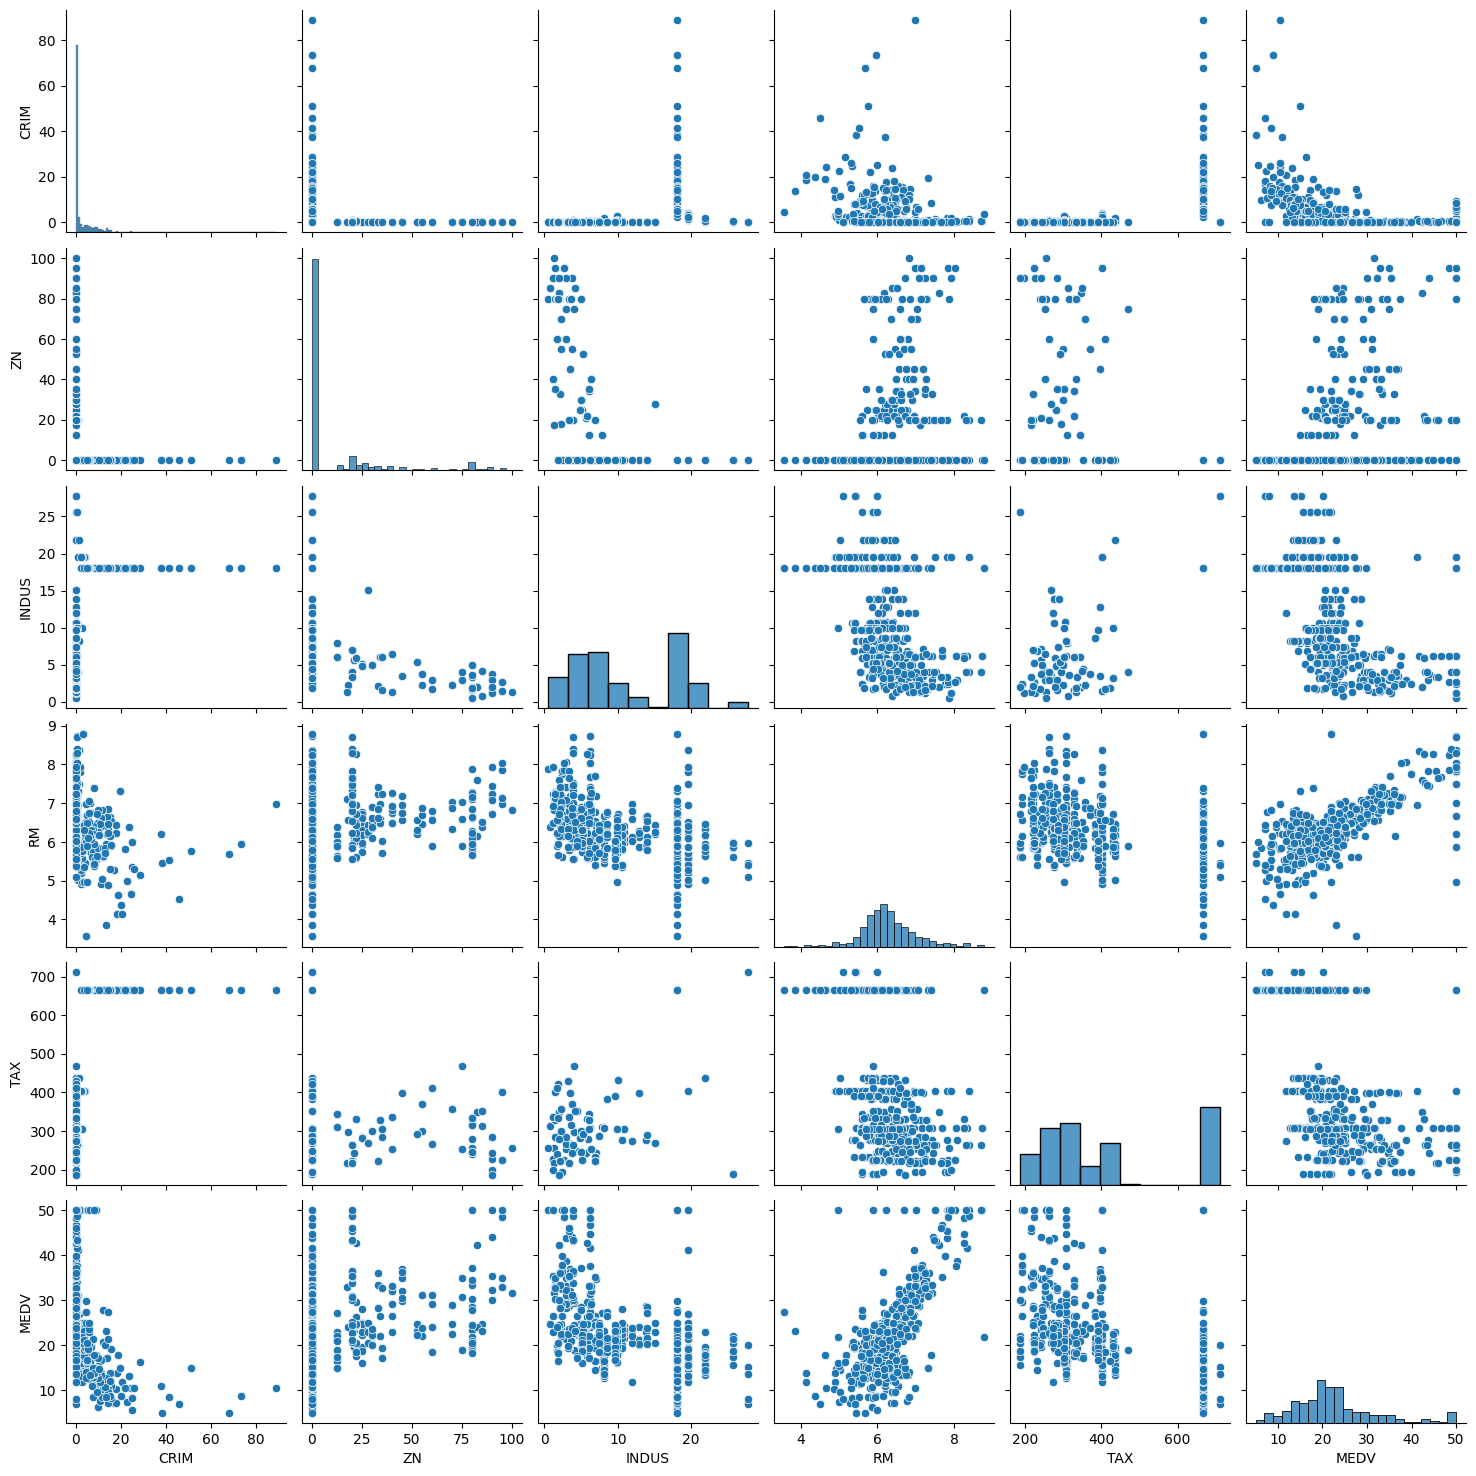

In [ ]:
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'RM', 'TAX', 'MEDV']])
plt.show()

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Here’s a summary of the approaches I have tried with linear regression and the final results:

1.   All Features Without Scaling: Applied linear regression on all features without scaling.
2.   All Features With Scaling: Applied linear regression on all features with feature scaling.
3. Limited Features (Recursive Feature Elimination): Tried using a subset of features.
4. Lasso Regression: Applied Lasso regression for feature selection and regularization.
5. Filter data for outliers using z-score and then simple linear regression.


Best Model:
*   Approach: Linear regression using all features without feature scaling (normalization).
*   Test R-squared: 0.7166209449097798
*   Mean Squared Error: 21.115450613869438


Conclusion: I have tried multiple things with linear regression, even with different train test splits, but so far, for me, using all features without feature scaling and 70/30 train test split was on top with performance.


PS: For model evaluation I have used following 2 matrices:

* Mean Squared Error (MSE): Measures the average of the squared differences between the actual and predicted values. Lower values indicate better model performance.
*   R-squared: Indicates how well the model explains the variability of the target variable. Values closer to 1 are better.
* I have only added best performing LR model here


In [ ]:
# using all features other than MEDV which obviously is the target.
X = df.drop(columns=['MEDV'])
y = df['MEDV']  # Target variable

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression (without feature scaling)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_test = lr_model.predict(X_test)

# Model evaluation
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Mean Squared Error: {test_mse}')
print(f'R-squared: {test_r2}')

Mean Squared Error: 21.115450613869438
R-squared: 0.7166209449097798


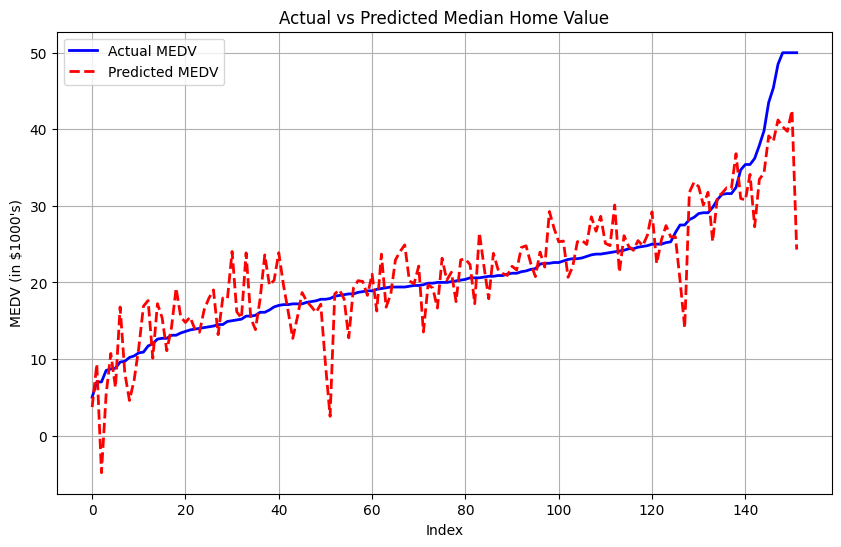

In [ ]:
# Sort the test set for a cleaner line chart
sorted_index = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_index]
y_pred_sorted = y_pred_test[sorted_index]

# Plot actual vs predicted values as line charts
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted.values, label='Actual MEDV', color='b', linewidth=2)
plt.plot(y_pred_sorted, label='Predicted MEDV', color='r', linestyle='--', linewidth=2)

# Add labels, title, and legend
plt.xlabel("Index")
plt.ylabel("MEDV (in $1000's)")
plt.title("Actual vs Predicted Median Home Value")
plt.legend()
plt.grid(True)
plt.show()

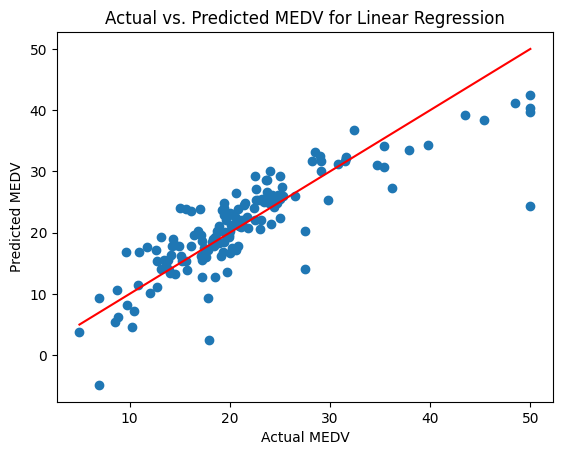

In [ ]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs. Predicted MEDV for Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line of best fit
plt.show()

# Decision Tree, Random Forest Regressor, Gradient Boosting Regressor with Outliers

Train-Test split has been done on (70-30)% of data.

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Dictionary to store models and their results
model_results = {}

# Step 1: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

# Store results
model_results['Decision Tree'] = {'MSE': dt_mse, 'R2': dt_r2}

# Step 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Store results
model_results['Random Forest'] = {'MSE': rf_mse, 'R2': rf_r2}

# Step 3: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

# Store results
model_results['Gradient Boosting'] = {'MSE': gb_mse, 'R2': gb_r2}

# Print all results
for model_name, metrics in model_results.items():
    print(f"\n{model_name} Results:")
    print(f"Test Mean Squared Error: {metrics['MSE']}")
    print(f"Test R-squared: {metrics['R2']}")



Decision Tree Results:
Test Mean Squared Error: 11.282500000000002
Test R-squared: 0.8485836628579762

Random Forest Results:
Test Mean Squared Error: 9.686613907894738
Test R-squared: 0.8700011879244487

Gradient Boosting Results:
Test Mean Squared Error: 8.126460502912597
Test R-squared: 0.8909391639015861


Among these models, Gradient Boosting Regressor(GB) has better performance as the R-squared value is higher than others.
And GB performs better because of its sequential error correction, flexibility in handling complex, non-linear relationships, and robustness against overfitting through regularization. Additionally, its ability to handle different data types and integrate regularization techniques (like learning rate and sub-sampling) further boosts its performance

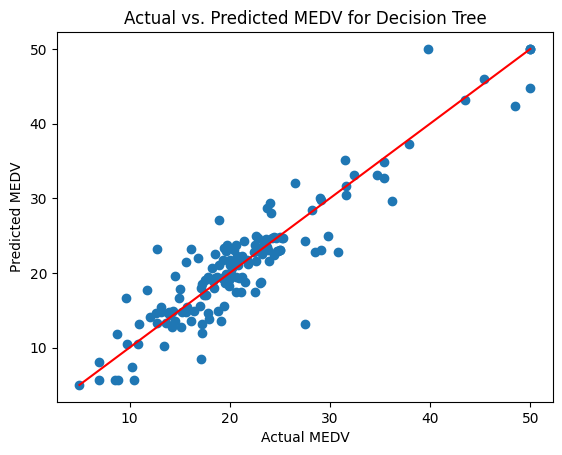

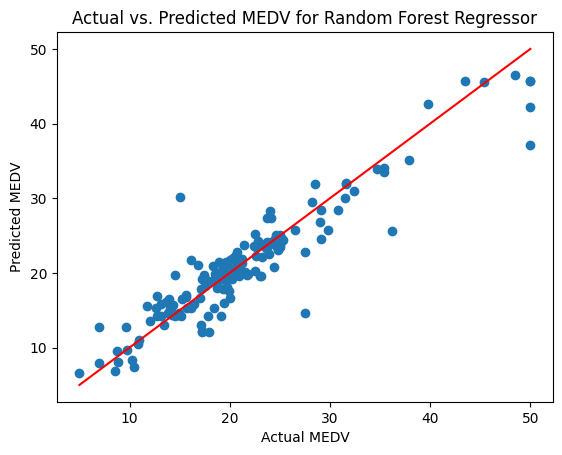

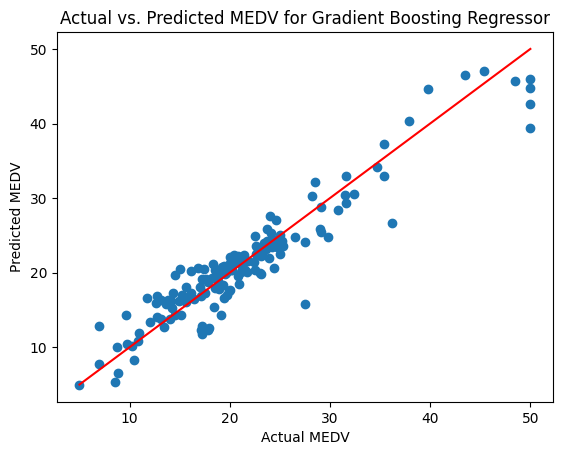

In [ ]:
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs. Predicted MEDV for Decision Tree")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line of best fit
plt.show()

plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs. Predicted MEDV for Random Forest Regressor")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line of best fit
plt.show()

plt.scatter(y_test, y_pred_gb)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs. Predicted MEDV for Gradient Boosting Regressor")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line of best fit
plt.show()

From the visualization, some outliers can be noticed above the value of 40 in MEDV.

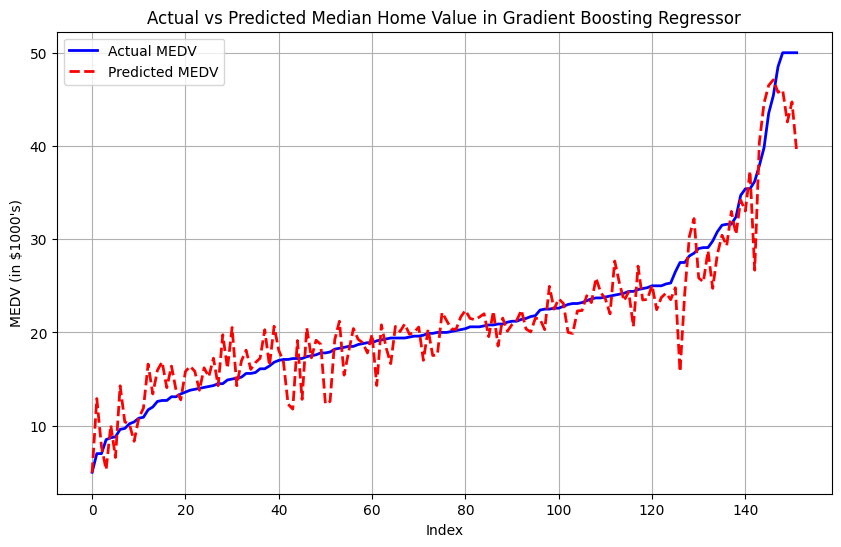

In [ ]:
# Sort the test set for a cleaner line chart
sorted_index = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_index]
y_pred_sorted = y_pred_gb[sorted_index]

# Plot actual vs predicted values as line charts
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted.values, label='Actual MEDV', color='b', linewidth=2)
plt.plot(y_pred_sorted, label='Predicted MEDV', color='r', linestyle='--', linewidth=2)

# Add labels, title, and legend
plt.xlabel("Index")
plt.ylabel("MEDV (in $1000's)")
plt.title("Actual vs Predicted Median Home Value in Gradient Boosting Regressor")
plt.legend()
plt.grid(True)
plt.show()

# Important Feature Selection

As, Gradient Boosting Regressor(GB) performs better. So, I tried to observe the important feature for GB.

In [ ]:
model = gb_model
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
})

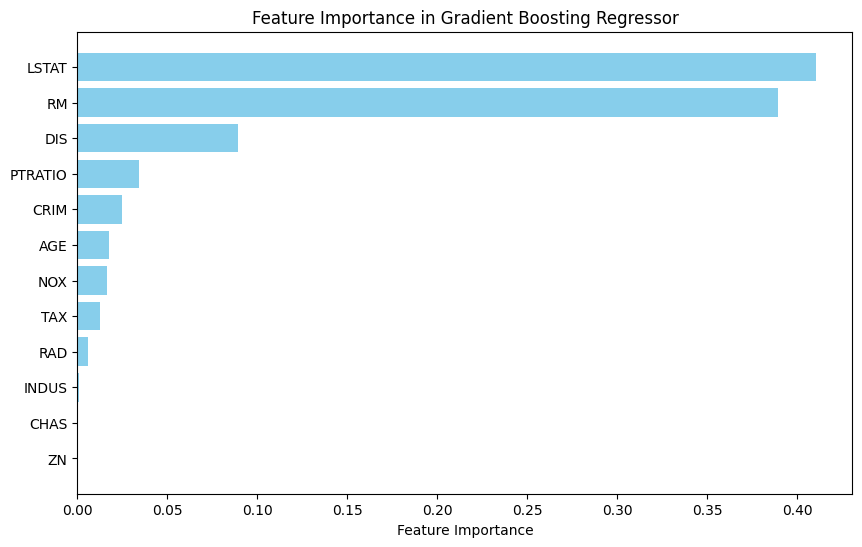

In [ ]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df[importance_df['Importance'] > 0]

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting Regressor')
plt.gca().invert_yaxis()
plt.show()

# Decision Tree, Random Forest Regressor, Gradient Boosting Regressor without Outliers

<Axes: xlabel='MEDV'>

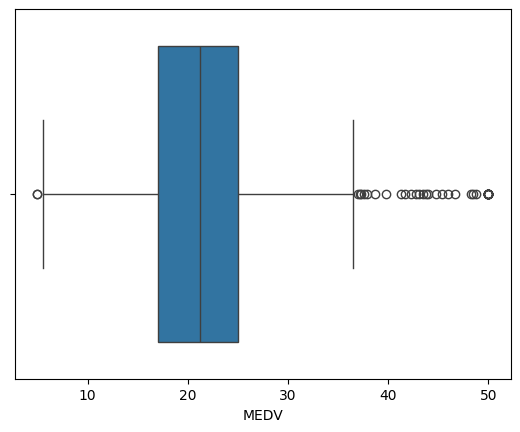

In [ ]:
#Checking outliers through boxplot
import seaborn as sns
sns.boxplot(x=df['MEDV'])

The circles plotted outside the whiskers on the right side (above the value of 40 for MEDV) are outliers. These points are much higher than the majority of the data.

The boxplot suggests that the interquartile range (IQR), which is the distance between the first quartile (Q1) and the third quartile (Q3), defines the central range of the data. Data points beyond 1.5 times the IQR from Q1 and Q3 are considered outliers.

#  Interquartile Range (IQR):
The IQR method defines outliers as values lying outside 1.5 times the IQR from the lower (25th) or upper (75th) quartile

In [ ]:
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[(df['MEDV'] >= lower_bound) & (df['MEDV'] <= upper_bound)]

<Axes: xlabel='MEDV'>

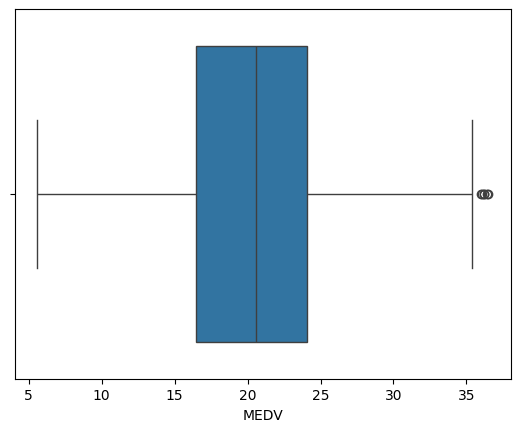

In [ ]:
import seaborn as sns
sns.boxplot(x=df_clean['MEDV'])

In [ ]:
# using all features other than MEDV which obviously is the target.
X = df_clean.drop(columns=['MEDV'])
y = df_clean['MEDV']  # Target variable

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store models and their results
model_results = {}

# Step 1: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

# Store results
model_results['Decision Tree'] = {'MSE': dt_mse, 'R2': dt_r2}

# Step 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Store results
model_results['Random Forest'] = {'MSE': rf_mse, 'R2': rf_r2}

# Step 3: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

# Store results
model_results['Gradient Boosting'] = {'MSE': gb_mse, 'R2': gb_r2}

# Print all results
for model_name, metrics in model_results.items():
    print(f"\n{model_name} Results:")
    print(f"Test Mean Squared Error: {metrics['MSE']}")
    print(f"Test R-squared: {metrics['R2']}")




Decision Tree Results:
Test Mean Squared Error: 14.767500000000002
Test R-squared: 0.6067789497846272

Random Forest Results:
Test Mean Squared Error: 7.313212314285721
Test R-squared: 0.805267714462744

Gradient Boosting Results:
Test Mean Squared Error: 6.65162828449541
Test R-squared: 0.8228840183056332


After removing outliers, still GB performs better.

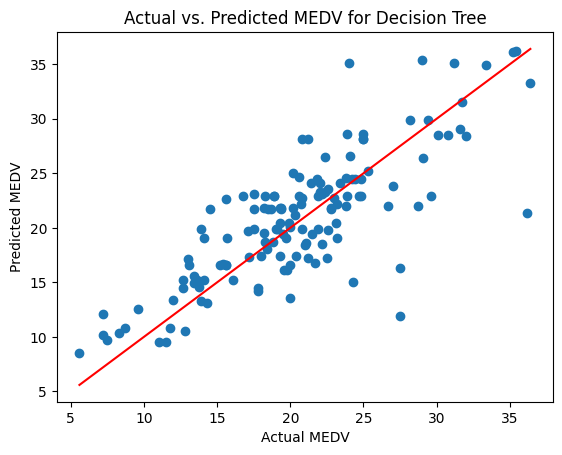

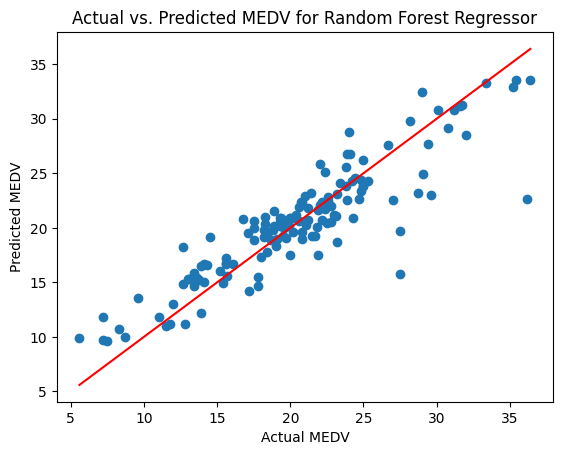

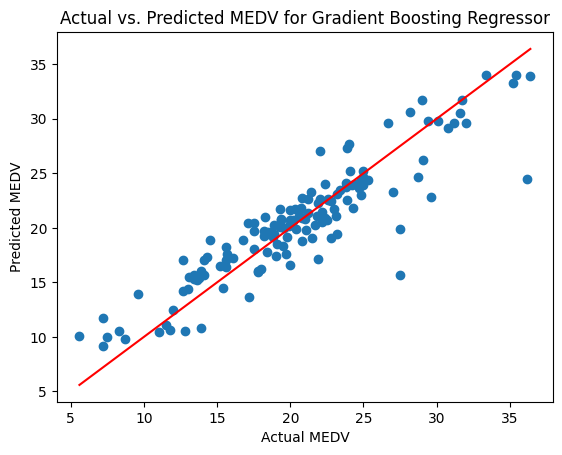

In [ ]:
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs. Predicted MEDV for Decision Tree")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line of best fit
plt.show()

plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs. Predicted MEDV for Random Forest Regressor")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line of best fit
plt.show()

plt.scatter(y_test, y_pred_gb)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs. Predicted MEDV for Gradient Boosting Regressor")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line of best fit
plt.show()

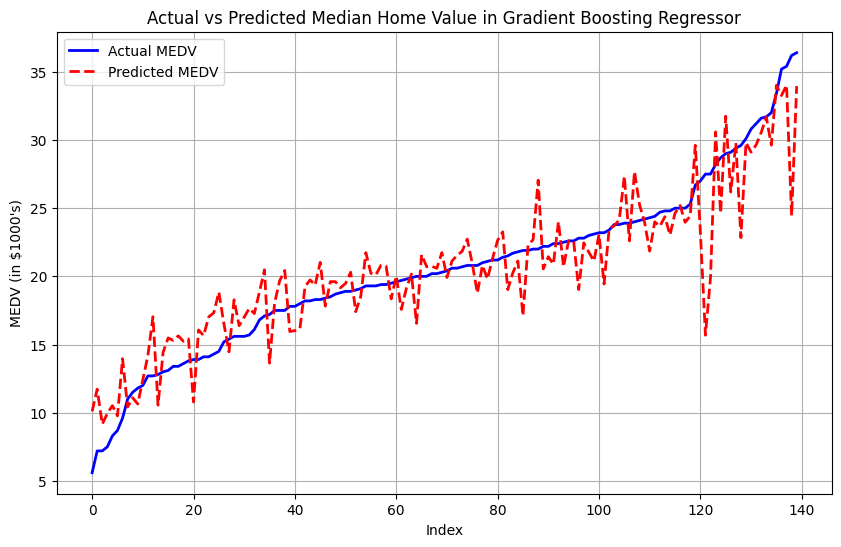

In [ ]:
# Sort the test set for a cleaner line chart
sorted_index = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_index]
y_pred_sorted = y_pred_gb[sorted_index]

# Plot actual vs predicted values as line charts
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted.values, label='Actual MEDV', color='b', linewidth=2)
plt.plot(y_pred_sorted, label='Predicted MEDV', color='r', linestyle='--', linewidth=2)

# Add labels, title, and legend
plt.xlabel("Index")
plt.ylabel("MEDV (in $1000's)")
plt.title("Actual vs Predicted Median Home Value in Gradient Boosting Regressor")
plt.legend()
plt.grid(True)
plt.show()

# Support Vector Regression (SVR)

**Summary of Approaches with Support Vector Regression (SVR)**

*   Dataset split: 70% training, 30% testing (same used in previous models)
*   Scaling: Applied standard scaling using StandardScaler.

1.   **SVR with RBF Kernel (Simple Version)**:

*   Applied SVR with RBF kernal on all features wih feature scaling   
*   Results: **Test** **R-squared**: **0.6579564914830097**, Mean Squared Error **(MSE)**: **25.48672063849504**


2.   **Optimized SVR with GridSearchCV**:

*   **Hyperparameter Tuning**: Used **GridSearchCV** with **5-fold cross-validation** to tune **C**, **epsilon**, and **gamma** parameters for the RBF kernel in SVR. Where C (regularization) controls the balance between fitting the training data well, epsilon defines the margin within which no penalty is given to errors & gamma adjusts how much influence each data point has on the model, helping capture more complex patterns.
  
*   Results: **Test** **R-squared**: **0.8387003182893529**, Mean Squared Error **(MSE)**: **6.057643781677839**



By applying hyperparameter tuning with GridSearchCV, the R-squared improved from **0.6579** to **0.8387**, and the MSE decreased from **25.48** to **6.05**, showing a significant performance gain and reduction in prediction errors.



**Import Libraries**

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

**Data Scaling**

StandardScaler is used to normalize the data. SVR is sensitive to feature scaling, so this step ensures that all features are on the same scale

In [ ]:
# Step 1: Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Hyperparameter Tuning with GridSearchCV**

This section performs hyperparameter tuning using **GridSearchCV**, which systematically explores different combinations of model parameters such as **C** (regularization), **epsilon** (error margin), and **gamma** (kernel coefficient).

These hyperparameters are defined in param_grid and tested over multiple splits of the training data using 5-fold cross-validation. The goal is to find the best-performing combination based on minimizing negative mean squared error (MSE), ensuring the model generalizes well without overfitting.

In [ ]:
# Step 2: Perform Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],   # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5, 1],  # Epsilon in the epsilon-SVR model
    'gamma': ['scale', 0.1, 0.01, 0.001]  # Kernel coefficient
}

# Step 3: Initialize SVR and use GridSearchCV
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 0.1, 0.01, 0.001]},
             scoring='neg_mean_squared_error')

**Getting the Best SVR Model & making predictions**

Retrieves the best model (best_svr_model) after evaluating different combinations of hyperparameters from the GridSearchCV. After that it makes prediction of **MEDV** values

In [ ]:
# Step 4: Get the best model after tuning
best_svr_model = grid_search.best_estimator_
y_pred_svr_best = best_svr_model.predict(X_test_scaled)

**Performance Evaluation**

Evaulates the model using two metrics:


1.   **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values (lower is better).
2.   **R-squared (R²)**: Measures how well the model explains the variability in the target variable (closer to 1 is better).



In [ ]:
# Step 6: Calculate performance metrics
svr_mse_best = mean_squared_error(y_test, y_pred_svr_best)
svr_r2_best = r2_score(y_test, y_pred_svr_best)

print(f'SVR – Mean Squared Error: {svr_mse_best}')
print(f'SVR – R-squared: {svr_r2_best}')

SVR – Mean Squared Error: 6.057643781677839
SVR – R-squared: 0.8387003182893529


**Plotting Actual vs. Predicted Values of MEDV**

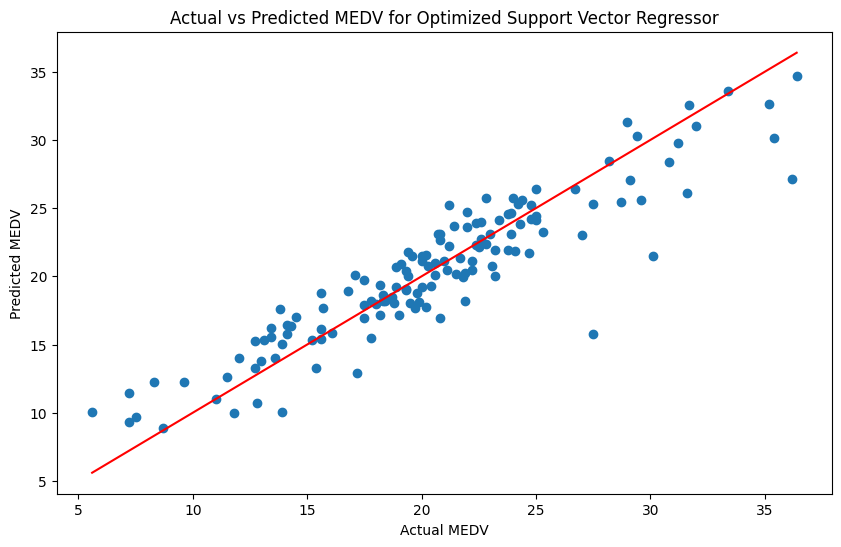

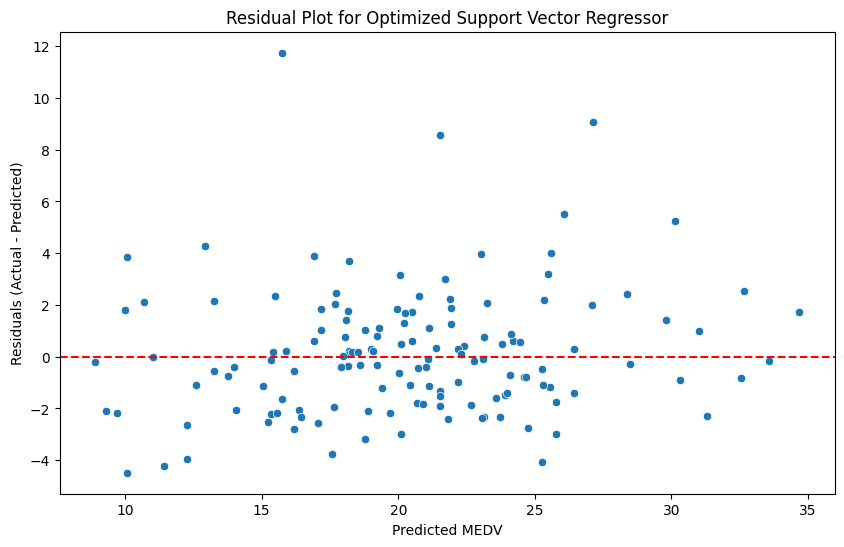

In [ ]:
# Step 7: Plot Actual vs Predicted MEDV
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV for Optimized Support Vector Regressor')
plt.show()


# Calculate residuals
residuals = y_test - y_pred_svr_best

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_svr_best, y=residuals)
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at 0 for reference
plt.xlabel('Predicted MEDV')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Optimized Support Vector Regressor')
plt.show()

# Analytical Comparison of Models

**Dataset Split & Scaling**


*   All models used a **70% training** and **30% testing** split.
*   **Standard Scaling** was applied for the **SVR** model but not for other models.

**Comparison Table of Results**

*   **Gradient Boosting Regressor** performed the **best**, with the highest **R-squared (0.8909)** and **lowest MSE** **(8.12)**, demonstrating its strength in capturing complex patterns.

*   **Optimized** **SVR** showed significant improvement after tuning, achieving an **R-squared** of **0.8387** and **MSE** of **6.05**.


*   **Random Forest** also performed well, with an **R-squared** of **0.8700** and **MSE** of **9.69**.
*   **Linear Regression** had the **lowest R-squared** **(0.7166)**, indicating it explains less variability compared to the others, with an **MSE** of **21.11**.

Complete detailed results are shown below
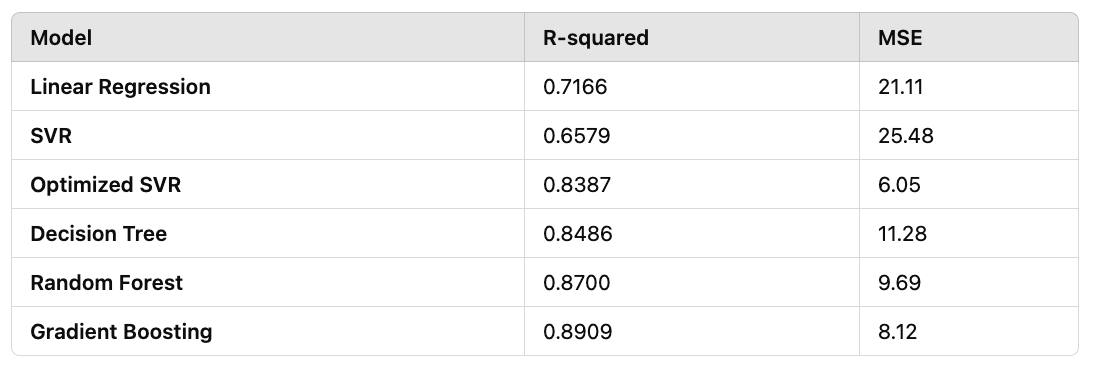
**Analysis of Results**


1.   **Linear Regression**


*   **Pros**: Simple, interpretable, and works well without scaling.
*   **Cons**: R-squared is lower, meaning it explains less variability in the data. The model does not capture non-linear relationships well, leading to higher MSE compared to other models.


*   **Best Use Case**: When interpretability is key, and the dataset is linear.

2.   **Support Vector Regressor (SVR)**


*   **Original SVR:** The **simple SVR (RBF Kernel**) without hyperparameter tuning had **lower R-squared (0.6579)** and higher MSE (25.48), indicating weaker performance.
*   **Optimized SVR:** After applying **GridSearchCV** for hyperparameter tuning, the model showed a large improvement, achieving an **R-squared of 0.8387** and **MSE of 6.05**. It now competes closely with tree-based models, showing its strength in non-linear data after proper tuning.


*   **Pros**: Flexible in capturing non-linear relationships. Performs better when optimized.

*   **Cons**: Requires tuning to work effectively, can be slower to train compared to simpler models like linear regression.
*   **Best Use Case**: For non-linear datasets, when capturing complex patterns is necessary, but requires tuning.


3.   **Decision Tree**

*   **Pros**: Simple to interpret, handles non-linear relationships, and faster to train

*   **Cons**: Prone to overfitting, as shown by its lower R-squared compared to ensemble methods like Random Forest or Gradient Boosting.

*   **Best Use Case**: When simplicity is needed, but overfitting can be controlled.

4.   **Random Forest**

*   **Pros**: Higher R-squared (0.8700) and lower MSE (9.69), showing it captures more data variability. It reduces overfitting by averaging multiple decision trees.

*   **Cons**:  Slower to train and interpret compared to simpler models.

*   **Best Use Case**: When accuracy is key, and interpretability is less of a priority.

5.   **Gradient Boosting Regressor**

*   **Pros**: Highest R-squared (0.8909) and lowest MSE (8.12), indicating the best performance among all models. It excels at correcting errors in sequential training steps

*   **Cons**:  Computationally expensive and sensitive to hyperparameters.

*   **Best Use Case**: When high accuracy is critical, especially for non-linear and complex datasets.



# Conclusion

Based on the dataset's specific patterns, such as the presence of **non-linear relationships** between features like **LSTAT** and **RM** (which had high importance in tree-based models) and the **target variable (MEDV)**, **Gradient Boosting Regressor** excels by capturing these complexities. It consistently outperformed other models by handling **non-linearity** and reducing errors effectively. While **Optimized SVR** also improved performance, Gradient Boosting's ability to sequentially correct errors and handle important features like **DIS** and **PTRATIO** makes it the most suitable model for this dataset.